# Mandar Sanjay Chaudhari
# 220968222
# Section B Batch B4
# Week 3
# Multilinear Regression

# Mtcars Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv("mtcars.csv")
df1=df[['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']]
df

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


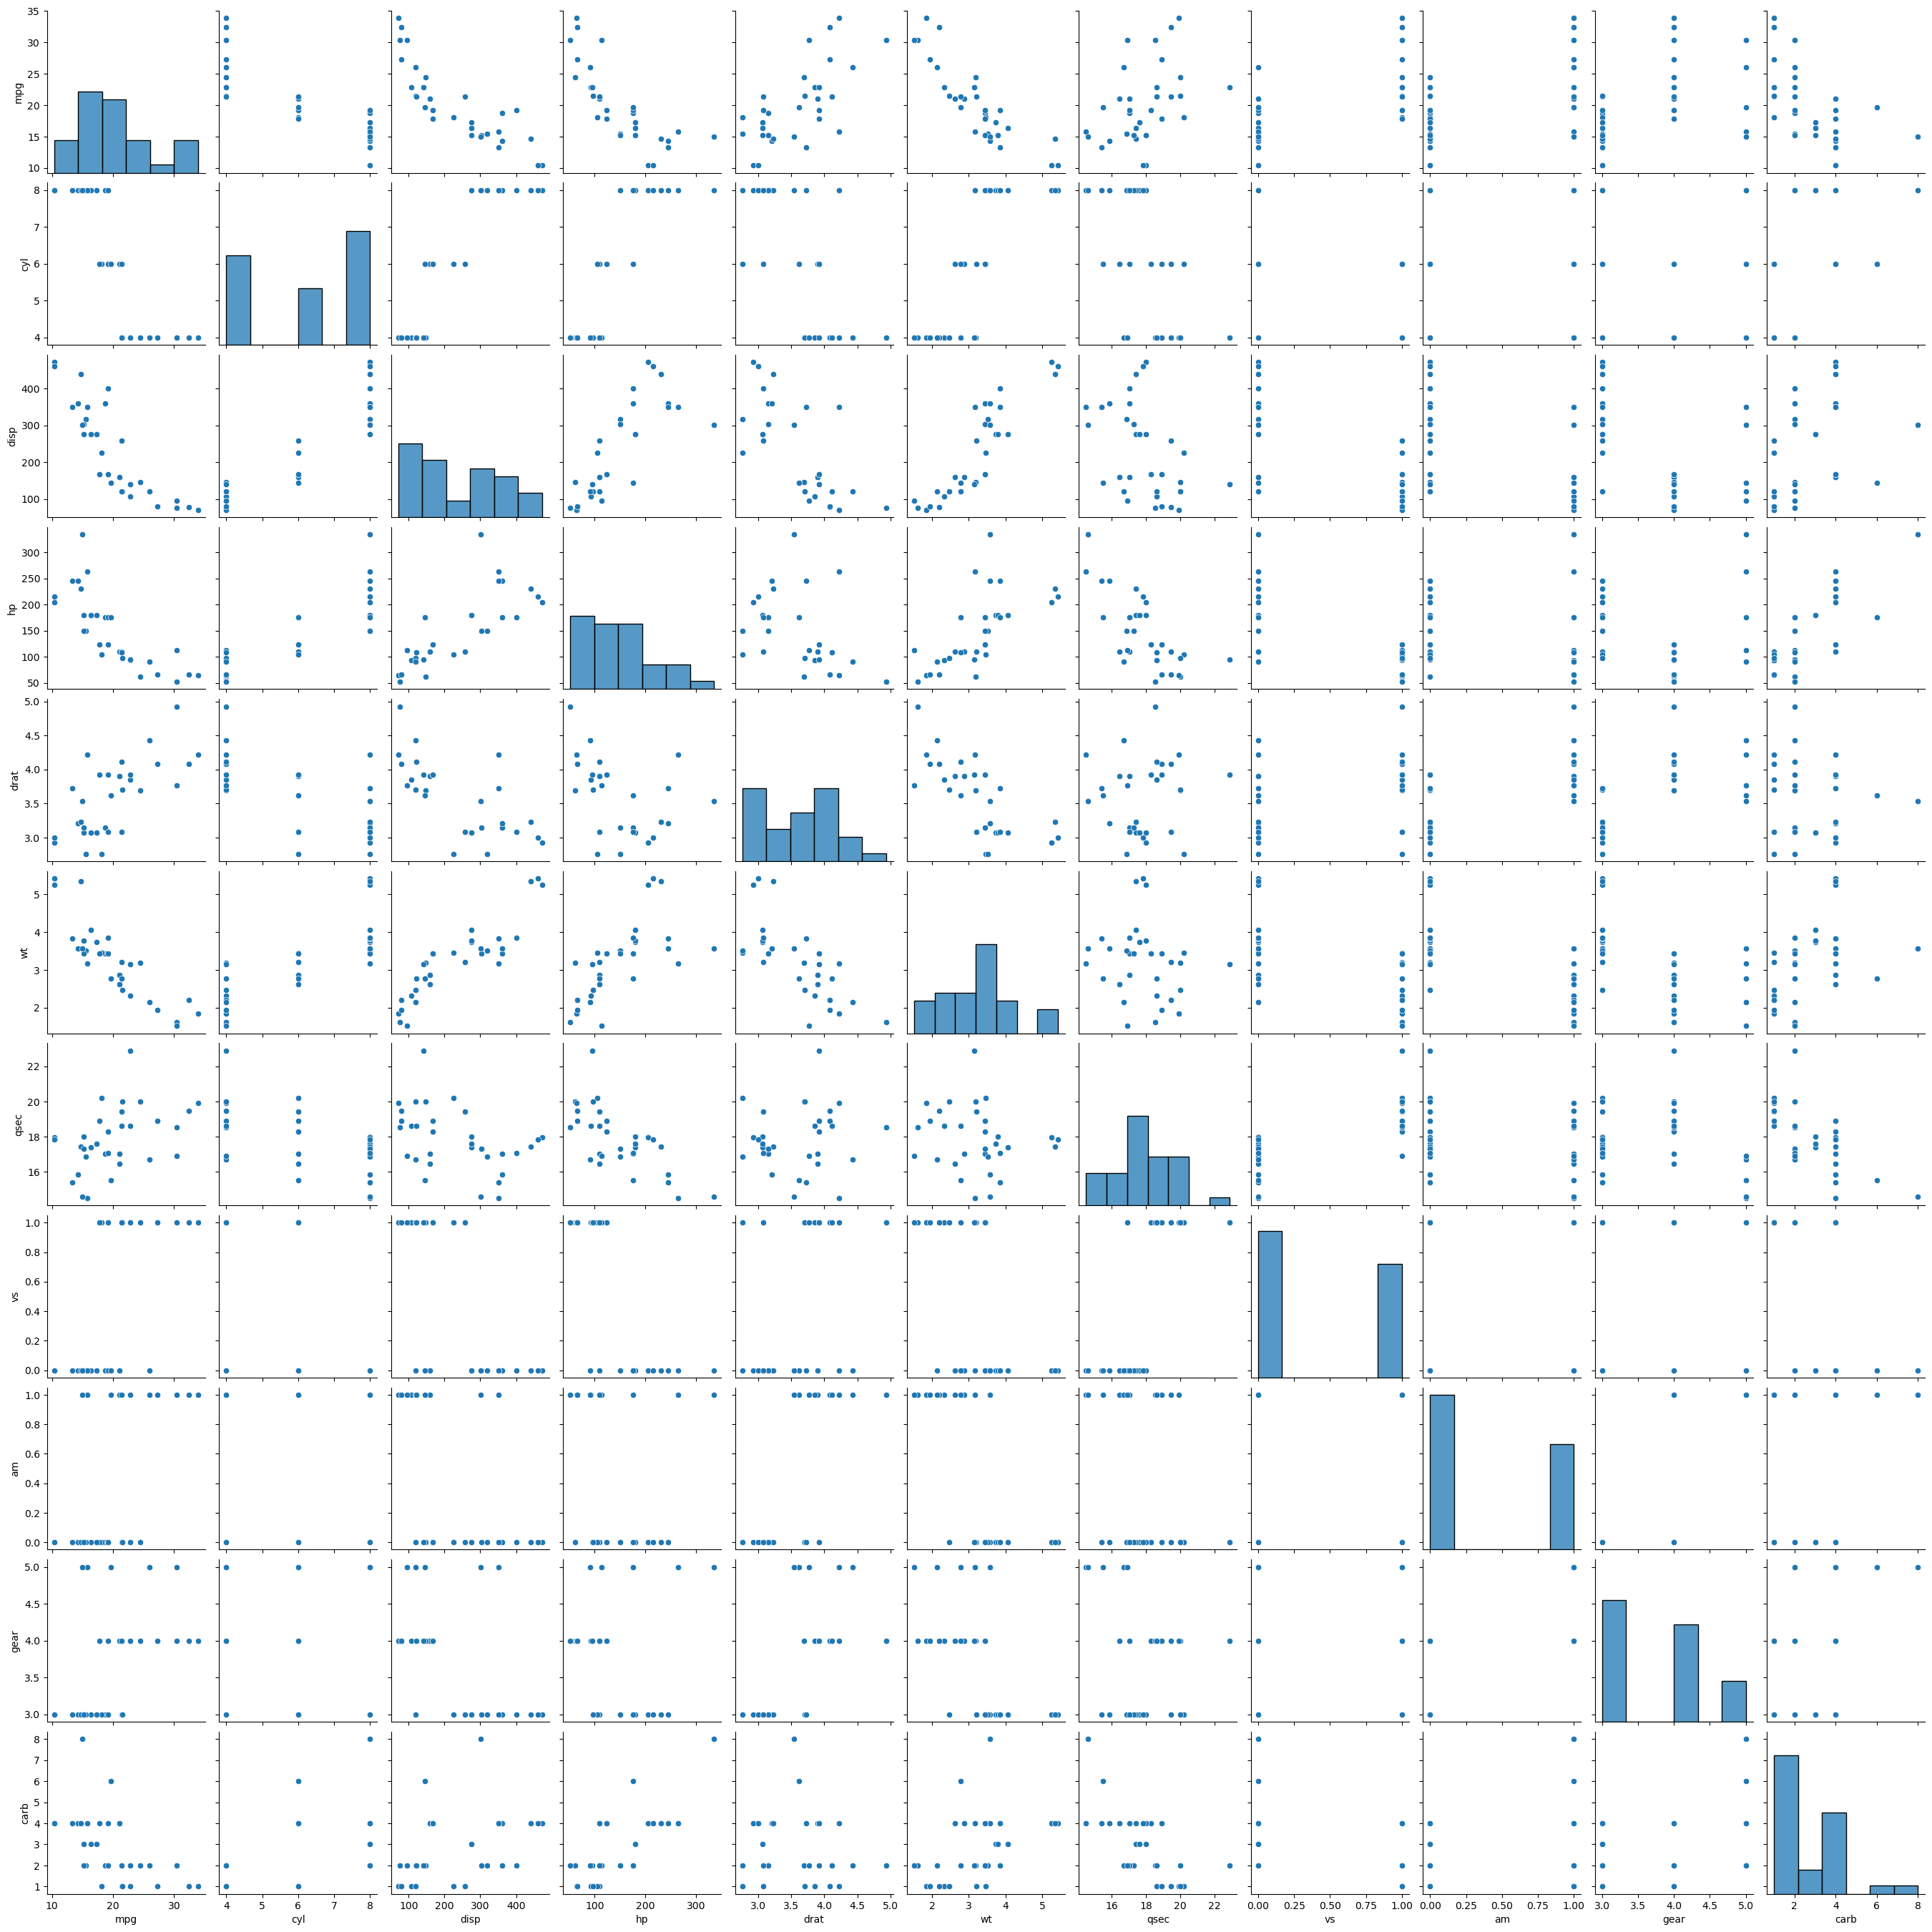

In [3]:
sns.pairplot(data=df1)

<Axes: >

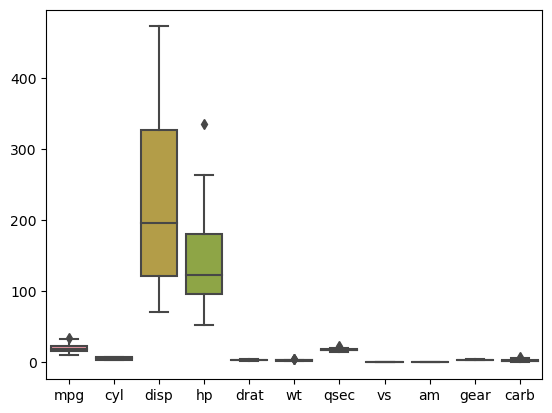

In [4]:
sns.boxplot(df1)

In [5]:
x=df1.iloc[:,1:]
x

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [6]:
y=df1.iloc[:,0]
y

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [7]:
x_train,x_test,y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.3) 
x_train

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
24,8,400.0,175,3.08,3.845,17.05,0,0,3,2
5,6,225.0,105,2.76,3.460,20.22,1,0,3,1
17,4,78.7,66,4.08,2.200,19.47,1,1,4,1
8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
30,8,301.0,335,3.54,3.570,14.60,0,1,5,8
25,4,79.0,66,4.08,1.935,18.90,1,1,4,1
23,8,350.0,245,3.73,3.840,15.41,0,0,3,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
31,4,121.0,109,4.11,2.780,18.60,1,1,4,2
6,8,360.0,245,3.21,3.570,15.84,0,0,3,4


In [8]:
x_test

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
11,8,275.8,180,3.07,4.070,17.40,0,0,3,3
22,8,304.0,150,3.15,3.435,17.30,0,0,3,2
10,6,167.6,123,3.92,3.440,18.90,1,0,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
16,8,440.0,230,3.23,5.345,17.42,0,0,3,4
14,8,472.0,205,2.93,5.250,17.98,0,0,3,4
28,8,351.0,264,4.22,3.170,14.50,0,1,5,4
26,4,120.3,91,4.43,2.140,16.70,0,1,5,2
20,4,120.1,97,3.70,2.465,20.01,1,0,3,1
13,8,275.8,180,3.07,3.780,18.00,0,0,3,3


In [9]:
y_train

24    19.2
5     18.1
17    32.4
8     22.8
30    15.0
25    27.3
23    13.3
1     21.0
31    21.4
6     14.3
4     18.7
18    30.4
29    19.7
19    33.9
9     19.2
7     24.4
27    30.4
3     21.4
0     21.0
21    15.5
15    10.4
12    17.3
Name: mpg, dtype: float64

In [10]:
y_test

11    16.4
22    15.2
10    17.8
2     22.8
16    14.7
14    10.4
28    15.8
26    26.0
20    21.5
13    15.2
Name: mpg, dtype: float64

In [11]:
reg=LinearRegression()

In [12]:
reg.fit(x_train,y_train)

LinearRegression()

In [13]:
print("The intercept is:",reg.intercept_)

The intercept is: -23.064221000605013


In [14]:
print("The coefficients are:")
list(zip(x,reg.coef_))

The coefficients are:


[('cyl', 1.8734807504375461),
 ('disp', 0.011526860378056407),
 ('hp', -0.01312607827329427),
 ('drat', 3.440431715030573),
 ('wt', -3.242933673768103),
 ('qsec', 0.8601761606873496),
 ('vs', 0.4410392668260021),
 ('am', 1.5122947216588045),
 ('gear', 5.265514089150904),
 ('carb', -2.1386123630819265)]

In [15]:
reg.score(x_train,y_train)

0.9334428896586293

In [16]:
reg.score(x_test,y_test)

-0.3436380282988729

In [17]:
y_pred=reg.predict(x_test)

y_pred

array([14.45119469, 19.55712667, 20.03083377, 27.06058995,  9.98192105,
       10.43658038, 28.50076047, 30.85072694, 20.58770833, 15.90775115])

In [18]:
mean_squared_error(y_test,y_pred)

25.434530420486347

In [19]:
mean_absolute_error(y_test,y_pred)

3.6723545261802313

In [20]:
rms=np.sqrt(mean_squared_error(y_test,y_pred))
rms

5.043265848682414

# Diabetes dataset 

In [21]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


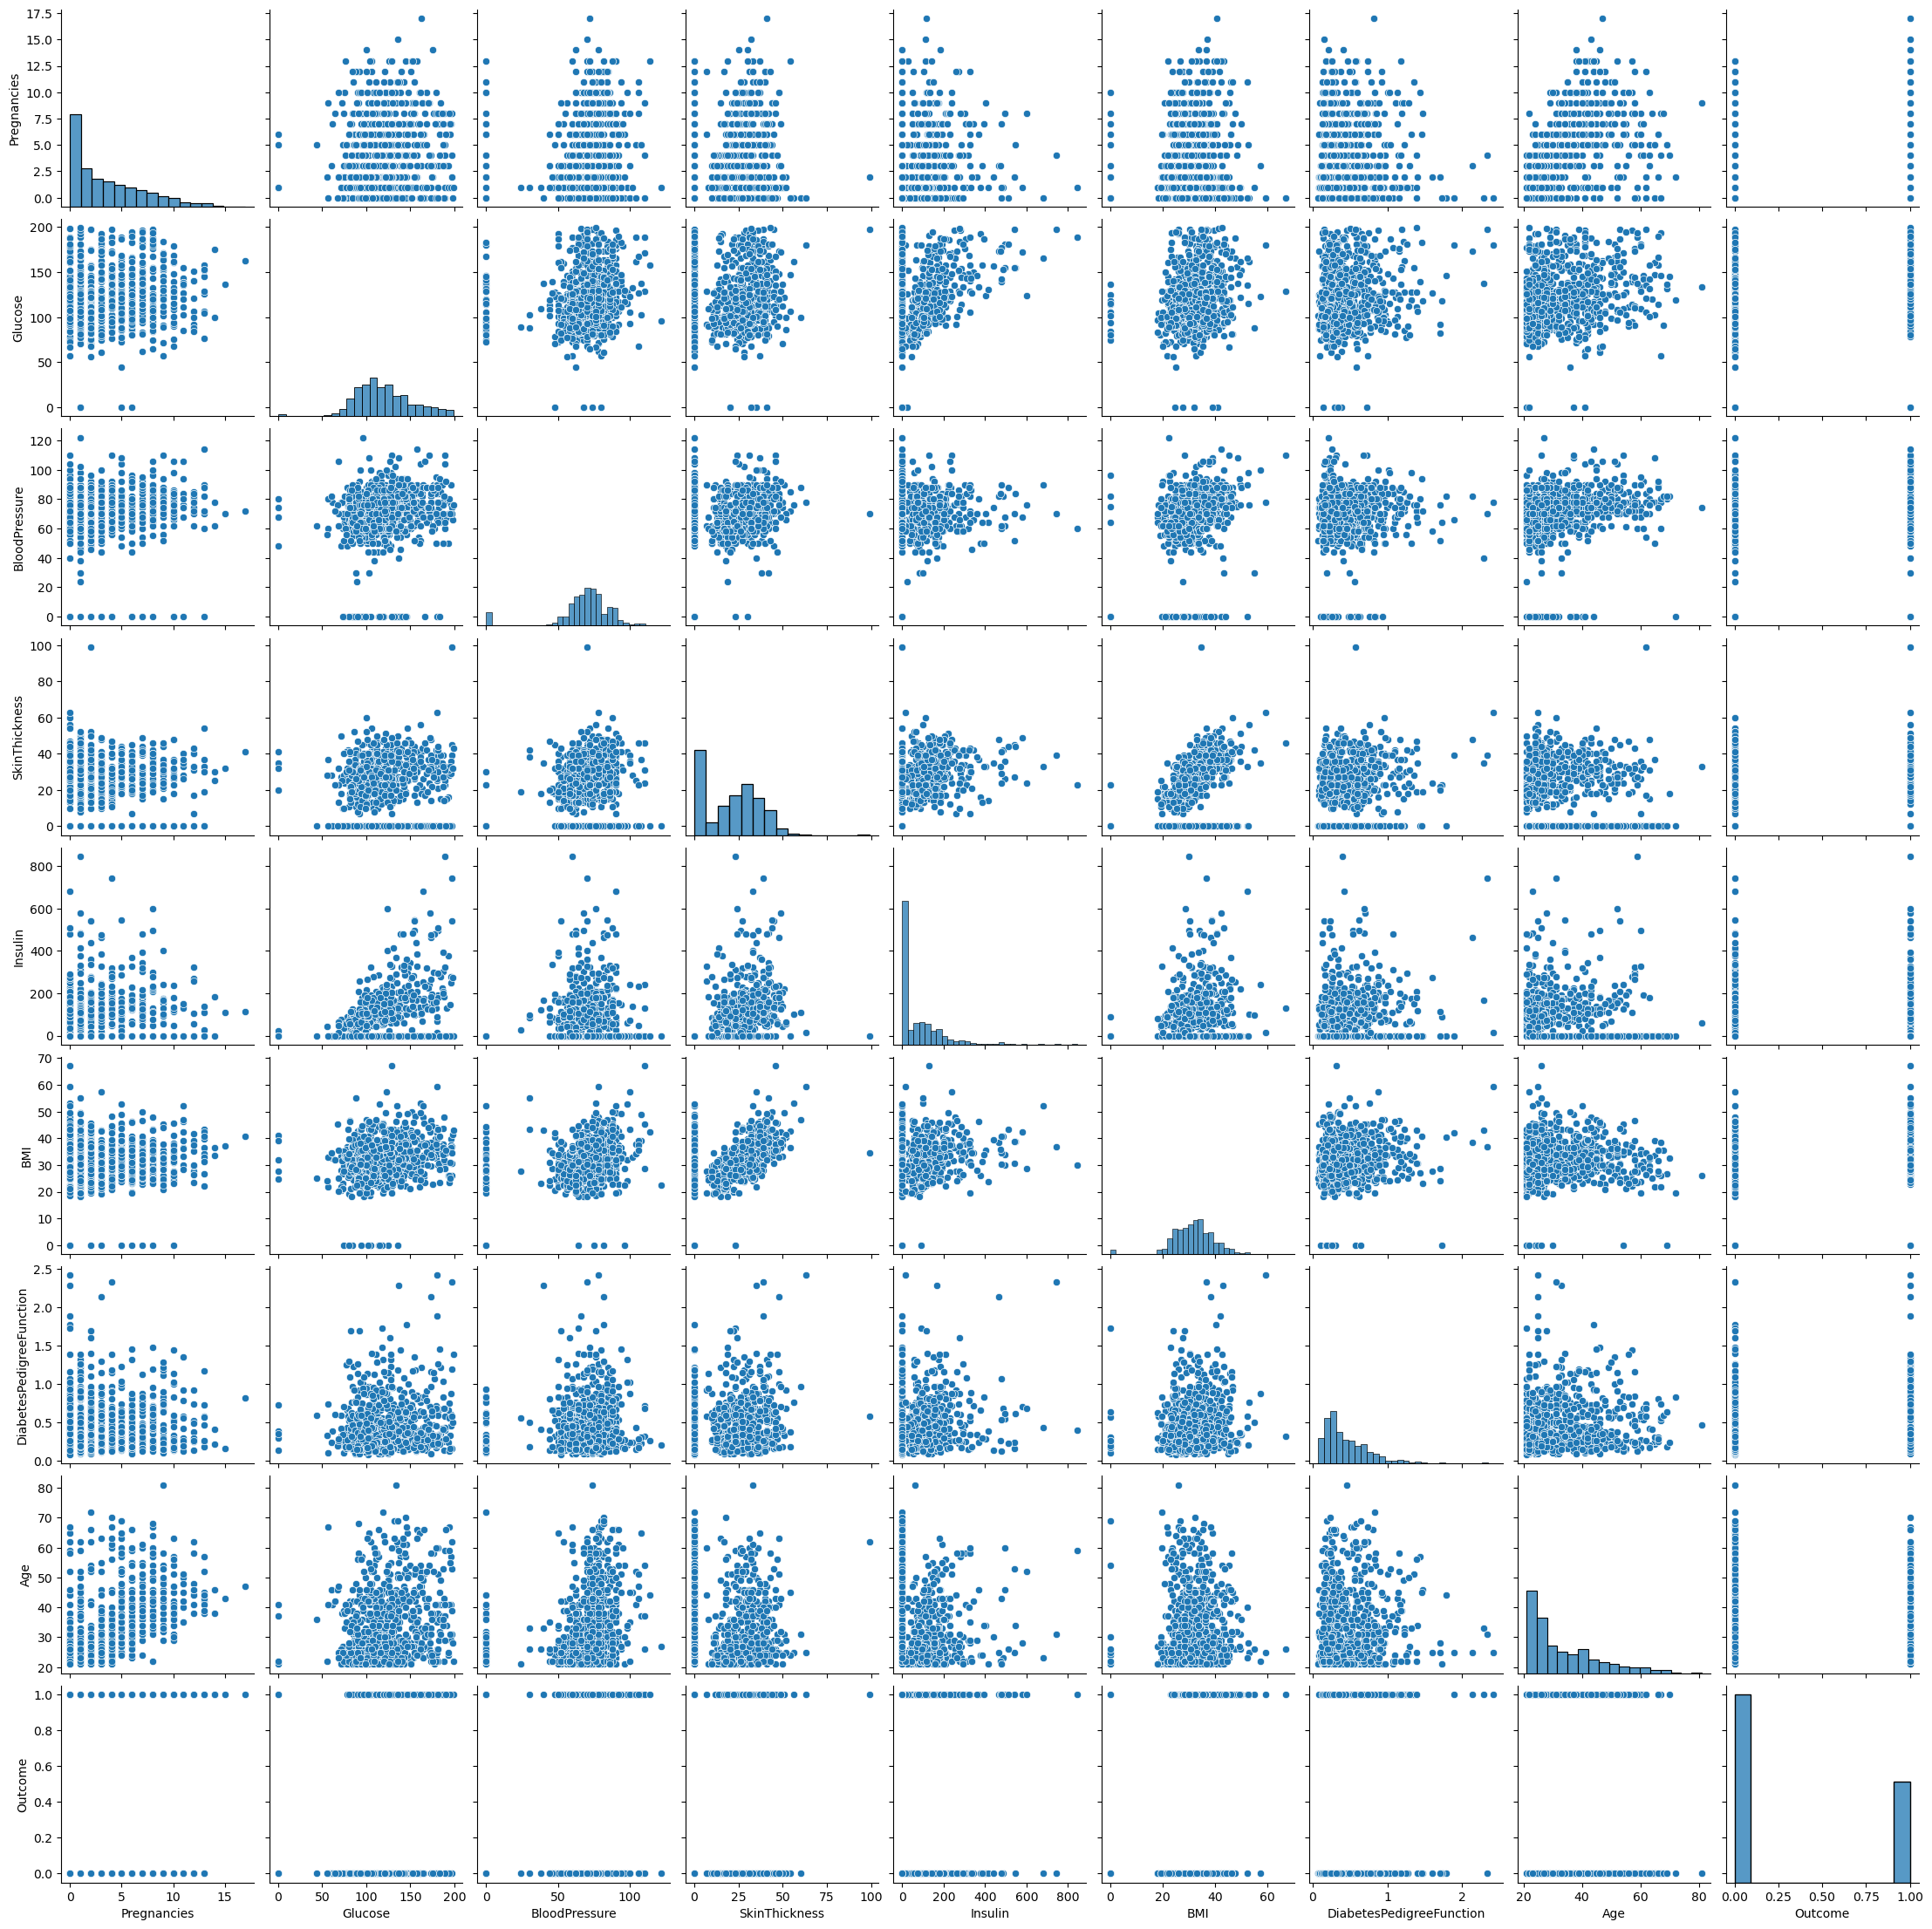

In [22]:
sns.pairplot(data=df)

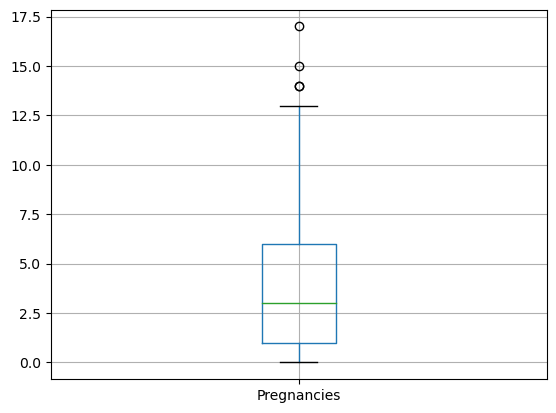

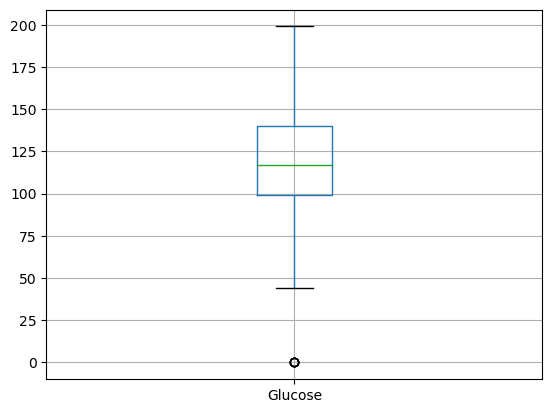

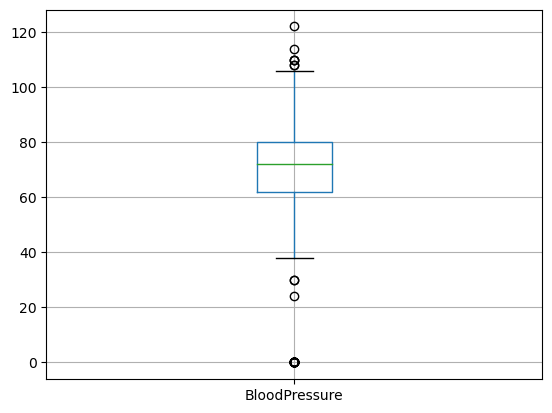

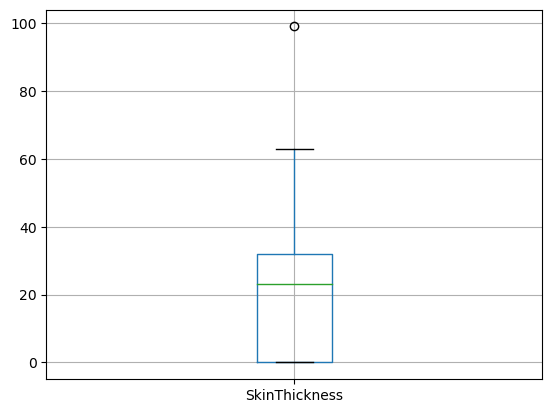

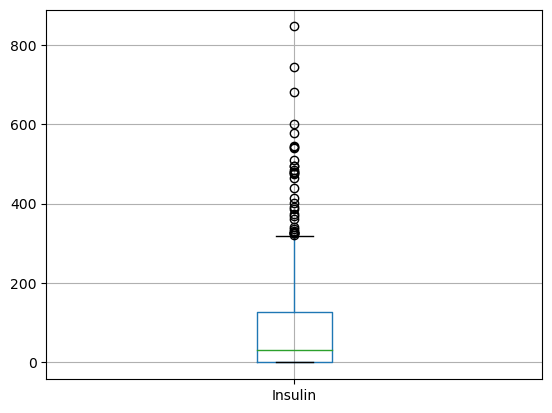

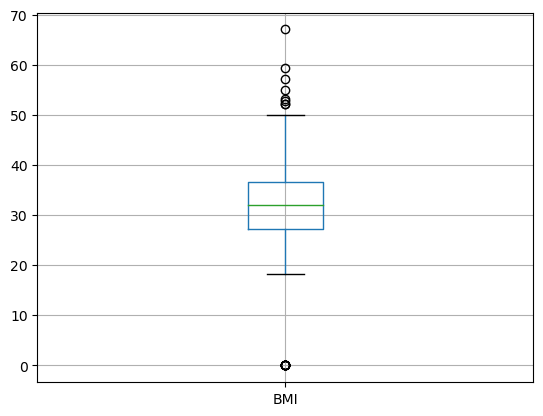

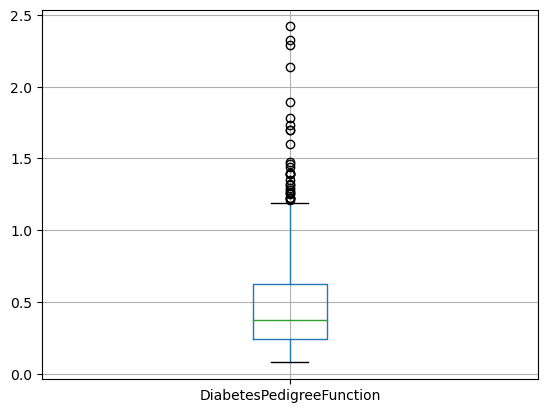

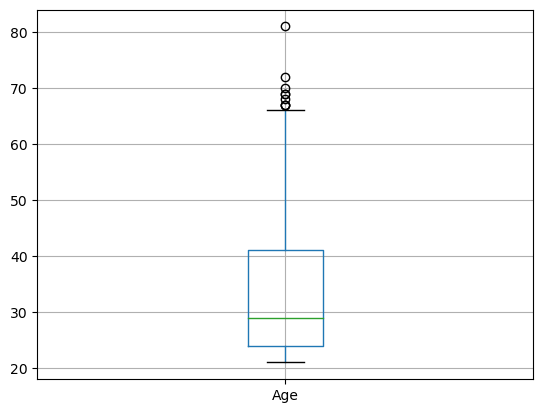

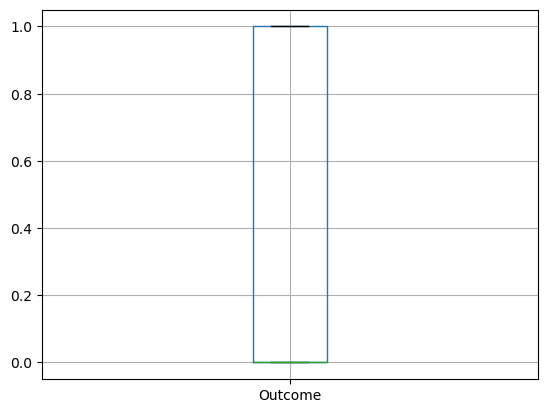

In [23]:
for column in df:
    plt.figure()
    df.boxplot([column])

In [24]:
x=df.iloc[:,1:]
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [25]:
y=df.iloc[:,0]
y

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [26]:
x_train,x_test,y_train, y_test=train_test_split(x,y,random_state=0,test_size=0.3) 
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
580,151,90,46,0,42.1,0.371,21,1
418,83,68,0,0,18.2,0.624,27,0
764,122,70,27,0,36.8,0.340,27,0
363,146,78,0,0,38.5,0.520,67,1
757,123,72,0,0,36.3,0.258,52,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
192,159,66,0,0,30.4,0.383,36,1
629,94,65,22,0,24.7,0.148,21,0
559,85,74,0,0,30.1,0.300,35,0


In [27]:
x_test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
661,199,76,43,0,42.9,1.394,22,1
122,107,74,30,100,33.6,0.404,23,0
113,76,62,0,0,34.0,0.391,25,0
14,166,72,19,175,25.8,0.587,51,1
529,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...
165,104,74,18,156,29.9,0.722,41,1
188,109,76,39,114,27.9,0.640,31,1
334,95,60,18,58,23.9,0.260,22,0
758,106,76,0,0,37.5,0.197,26,0


In [28]:
y_train

580     0
418     1
764     2
363     4
757     0
       ..
763    10
192     7
629     4
559    11
684     5
Name: Pregnancies, Length: 537, dtype: int64

In [29]:
y_test

661     1
122     2
113     4
14      5
529     0
       ..
165     6
188     8
334     1
758     1
34     10
Name: Pregnancies, Length: 231, dtype: int64

In [30]:
reg=LinearRegression()

In [31]:
reg.fit(x_train,y_train)

LinearRegression()

In [32]:
print("The intercept is:",reg.intercept_)

The intercept is: -0.36065663429523065


In [33]:
print("The coefficients are:")
list(zip(x,reg.coef_))

The coefficients are:


[('Glucose', -0.00318605294417845),
 ('BloodPressure', 0.005833251048967948),
 ('SkinThickness', 0.006692397897288519),
 ('Insulin', -0.0013964130471802194),
 ('BMI', -0.020471196174178433),
 ('DiabetesPedigreeFunction', -0.7360512775256363),
 ('Age', 0.14602590902623946),
 ('Outcome', 0.7322558719186391)]

In [34]:
reg.score(x_train,y_train)

0.30142467487017444

In [35]:
reg.score(x_test,y_test)

0.3406744191635317

In [36]:
y_pred=reg.predict(x_test)
y_pred

array([1.77697509, 2.16462591, 2.42569591, 6.6325942 , 3.20227072,
       2.61765928, 3.79251397, 6.33762108, 1.25556071, 6.70119253,
       3.0257911 , 6.19652366, 6.97391579, 1.48472885, 5.04254829,
       3.36045175, 4.37914059, 2.17851389, 8.24594159, 3.02787155,
       4.81233611, 2.14055131, 2.00614443, 5.94483007, 1.99936022,
       1.76376951, 2.88896863, 3.71707994, 2.58160693, 3.31913781,
       6.06203241, 1.75695621, 2.61451081, 2.36816412, 2.48960277,
       5.4238634 , 5.84336935, 2.1398639 , 2.46126069, 2.40992601,
       1.73603828, 1.58856353, 3.48200487, 3.13129755, 6.6938856 ,
       2.5513077 , 2.2493242 , 3.75450916, 2.97201775, 3.32695913,
       4.13613726, 1.99779884, 4.33523929, 4.75437115, 2.22039507,
       2.65707165, 3.67151834, 3.42882621, 2.72103426, 4.19387104,
       5.83108055, 2.74376787, 2.0470268 , 2.15273139, 3.57984037,
       4.46377678, 6.66988429, 4.88888031, 4.81963818, 4.72825147,
       1.98831286, 3.99345284, 2.71875932, 4.26519146, 2.79833

In [37]:
mean_squared_error(y_test,y_pred)

7.117642113919295

In [38]:
mean_absolute_error(y_test,y_pred)

2.0297293997537658

In [39]:
rms=np.sqrt(mean_squared_error(y_test,y_pred))
rms

2.6678909486557534